In [1]:
%pylab inline
from scipy.optimize import curve_fit
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import sys
import bookie_package as bp

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
df_both_seasons_home = pd.read_pickle('df_both_seasons_essentials')

## Add avg Home Team Goal Difference

In [3]:
d_both_seasons = bp.averages.avg_goal_diff(df_both_seasons_home, 'AVGHTGDIFF', 'HomeTeam', 'H')

In [4]:
df_both_seasons = bp.averages.from_dict_value_to_df(d_both_seasons)

In [5]:
df_both_seasons=df_both_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [6]:
import pickle
df_both_seasons.to_pickle('df_both_seasons')

In [7]:
avg_fthg_per_team=bp.averages.avg_goals(df_both_seasons, 'AVGFTHG', 'HomeTeam', 'H')

In [8]:
df_both_seasons = bp.averages.from_dict_value_to_df(avg_fthg_per_team)

In [9]:
#df_both_seasons.to_excel('wursti2.xlsx')

In [10]:
df_both_seasons=df_both_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [11]:
df_both_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
151,22,12,2019,Fortuna Dusseldorf,Union Berlin,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,0.9
152,22,12,2019,Paderborn,Ein Frankfurt,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,1.4
145,21,12,2019,Bayern Munich,Wolfsburg,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,3.4
146,21,12,2019,RB Leipzig,Augsburg,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.2
147,21,12,2019,Mainz,Leverkusen,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,1.3


## Add Columns with previous HTGDIFF for each HomeTeam

In [12]:
team_with_past_HTGDIFF=bp.averages.previous_data(df_both_seasons, 'HomeTeam', 'HTGDIFF')

In [13]:
df_team_with_past_HTGDIFF = bp.averages.from_dict_value_to_df(team_with_past_HTGDIFF)

In [14]:
df_team_with_past_HTGDIFF = df_team_with_past_HTGDIFF.reindex(columns=[
    'Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
    'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF','AVGFTHG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'HTGDIFF_1', 'HTGDIFF_2', 'HTGDIFF_3', 'HTGDIFF_4', 'HTGDIFF_5', 'HTGDIFF_6', 'HTGDIFF_7',
    'HTGDIFF_8', 'HTGDIFF_9', 'HTGDIFF_10', 'HTGDIFF_11', 'HTGDIFF_12', 'HTGDIFF_13', 'HTGDIFF_14', 'HTGDIFF_15', 'HTGDIFF_16', 'HTGDIFF_17', 'HTGDIFF_18', 'HTGDIFF_19',
    'HTGDIFF_20', 'HTGDIFF_21', 'HTGDIFF_22', 'HTGDIFF_23'
])

In [15]:
df_team_with_past_HTGDIFF.fillna(0, inplace=True)

In [16]:
team_with_past_HST=bp.averages.previous_data(df_team_with_past_HTGDIFF, 'HomeTeam', 'HST')

In [17]:
df_team_with_past_HST = bp.averages.from_dict_value_to_df(team_with_past_HST)

In [18]:

df_team_with_past_HST = df_team_with_past_HST.reindex(columns=[ 'Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
    'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF', 'AVGFTHG','HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'HTGDIFF_1', 'HTGDIFF_2', 'HTGDIFF_3', 'HTGDIFF_4', 'HTGDIFF_5', 'HTGDIFF_6', 'HTGDIFF_7',
    'HTGDIFF_8', 'HTGDIFF_9', 'HTGDIFF_10',  'HST_1',
 'HST_2',
 'HST_3',
 'HST_4',
 'HST_5',
 'HST_6',
 'HST_7',
 'HST_8',
 'HST_9',
 'HST_10' ])

In [19]:
# team_with_past_FTHG = bp.averages.previous_data(df_team_with_past_HST, 'HomeTeam', 'FTHG')

In [20]:
# df_team_with_past_FTHG = bp.averages.from_dict_value_to_df(team_with_past_FTHG)

In [21]:
#   df_team_with_past_FTHG = df_team_with_past_FTHG.reindex(columns=[ 'Day',
#     'Month',
#     'Year',
#     'HomeTeam',
#     'AwayTeam',
#     'FTHG',
#     'FTAG',
#     'HTGDIFF',
#     'ATGDIFF',
#     'AVGHTGDIFF',
#     'AVGFTHG',
#     'HS',
#     'AS',
#     'HST',
#     'AST',
#     'HC',
#     'AC',
#     'HF',
#     'AF',
#     'HY',
#     'AY',
#     'HR',
#     'AR',
#     'HTGDIFF_1',
#     'HTGDIFF_2',
#     'HTGDIFF_3',
#     'HTGDIFF_4',
#     'HTGDIFF_5',
#     'HTGDIFF_6',
#     'HTGDIFF_7',
#     'HTGDIFF_8',
#     'HTGDIFF_9',
#     'HTGDIFF_10',
#     'HTGDIFF_11',
#     'HTGDIFF_12',
#     'HTGDIFF_13',
#     'HTGDIFF_14',
#     'HTGDIFF_15',
#     'HTGDIFF_16',
#     'HTGDIFF_17',
#     'HTGDIFF_18',
#     'HTGDIFF_19',
#     'HTGDIFF_20',
#     'HTGDIFF_21',
#     'HTGDIFF_22',
#     'HTGDIFF_23',
#     'HST_1',
#     'HST_2',
#     'HST_3',
#     'HST_4',
#     'HST_5',
#     'HST_6',
#     'HST_7',
#     'HST_8',
#     'HST_9',
#     'HST_10',
#     'HST_11',
#     'HST_12',
#     'HST_13',
#     'HST_14',
#     'HST_15',
#     'HST_16',
#     'HST_17',
#     'HST_18',
#     'HST_19',
#     'HST_20',
#     'HST_21',
#     'HST_22',
#     'HST_23',
#     'FTHG_1',
#     'FTHG_2',
#     'FTHG_3',
#     'FTHG_4',
#     'FTHG_5',
#     'FTHG_6',
#     'FTHG_7',
#     'FTHG_8',
#     'FTHG_9',
#     'FTHG_10',
#     'FTHG_11',
#     'FTHG_12',
#     'FTHG_13',
#     'FTHG_14',
#     'FTHG_15',
#     'FTHG_16',
#     'FTHG_17',
#     'FTHG_18',
#     'FTHG_19',
#     'FTHG_20',
#     'FTHG_21',
#     'FTHG_22',
#     'FTHG_23' ])

In [22]:
# df_team_with_past_FTHG.sort_values(['Year', 'Month','Day'], ascending=False,inplace=True)

In [23]:
df_team_with_past_HST.fillna(0, inplace=True)

In [24]:
# # df_team_with_past_FTHG = df_team_with_past_FTHG[['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
#     'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF', 'AVGFTHG','HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'HTGDIFF_1', 'HTGDIFF_2', 'HTGDIFF_3', 'HTGDIFF_4', 'HTGDIFF_5', 'HTGDIFF_6', 'HTGDIFF_7',
#     'HTGDIFF_8', 'HTGDIFF_9', 'HTGDIFF_10',  'HST_1',
#  'HST_2',
#  'HST_3',
#  'HST_4',
#  'HST_5',
#  'HST_6',
#  'HST_7',
#  'HST_8',
#  'HST_9',
#  'HST_10',
#  'FTHG_1',
#  'FTHG_2',
#  'FTHG_3',
#  'FTHG_4',
#  'FTHG_5',
#  'FTHG_6',
#  'FTHG_7',
#  'FTHG_8',
#  'FTHG_9',
#  'FTHG_10'
#     ]]

In [25]:
#df_team_with_past_FTHG.to_excel('df_team_with_past_FTHG_home.xlsx')

In [26]:
# df_team_with_past_FTHG.columns

In [27]:
# df_team_with_past_FTHG.to_excel('herman.xlsx')

In [28]:
df_result = df_team_with_past_HST.copy()

In [29]:
df_result = df_result.drop(['HomeTeam', 'AwayTeam'], axis = 1)

In [30]:
print('Shape of features:', df_result.shape)

Shape of features: (561, 41)


## Features and Labels and Convert Data to Arrays

In [31]:
# Labels are the values we want to predict
labels = np.array(df_result['FTHG'])

# Remove the labels from the features
# axis 1 refers to the columns
#df_result= df_result.drop(['Year','Day','Month','HTGDIFF_10','FTHG_6','FTHG_8', 'FTHG_9', 'FTHG_10','FTHG', 'FTAG', 'HTGDIFF', 'ATGDIFF', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'], axis = 1)
df_result= df_result.drop(['FTHG','HST_9','HTGDIFF_3','HTGDIFF_6','HTGDIFF_7','HST_4', 'HST_7','HTGDIFF_5','HTGDIFF_8', 'HST_6', 'HST_10', 'HTGDIFF_9','HTGDIFF_10','FTAG', 'HTGDIFF', 'ATGDIFF', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'], axis = 1)

# Saving feature names for later use
feature_list = list(df_result.columns)

# Convert to numpy array
df_result = np.array(df_result)

## Training and Testing Sets

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    df_result, labels, test_size = 0.25,random_state = 42
)
                

In [33]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (420, 13)
Training Labels Shape: (420,)
Testing Features Shape: (141, 13)
Testing Labels Shape: (141,)


## Establish Baseline

In [34]:
# The baseline predictions are the historical averages
baseline_preds = train_features[:, feature_list.index('AVGFTHG')]
# AVerage goals made by home team

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - train_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'Goals.')

Average baseline error:  1.34 Goals.


## Train Model

In [35]:
rf = bp.prediction.random_forrest(train_features, train_labels, n_estimators=1000,random_state = 42)

## Make Predictions on Test Data

In [36]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Goals.')

Mean Absolute Error: 1.18 Goals.


In [37]:
#for i in zip(np.round(predictions,0), test_labels):
 #   print(i)

In [38]:
next_games=df_result
predictions_next_games = rf.predict(next_games)
next_games_predictions=np.round(predictions_next_games,0)

In [39]:
df_both_seasons['FTHG'] = next_games_predictions
df_both_seasons

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
151,22,12,2019,Fortuna Dusseldorf,Union Berlin,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,0.9
152,22,12,2019,Paderborn,Ein Frankfurt,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,1.4
145,21,12,2019,Bayern Munich,Wolfsburg,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,3.4
146,21,12,2019,RB Leipzig,Augsburg,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.2
147,21,12,2019,Mainz,Leverkusen,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,1.3
148,21,12,2019,Schalke 04,Freiburg,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.2
149,21,12,2019,FC Koln,Werder Bremen,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,1.6
150,21,12,2019,Hertha,M'gladbach,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
144,20,12,2019,Hoffenheim,Dortmund,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.9,1.1
139,18,12,2019,Leverkusen,Hertha,1.0,1.0,17.0,10.0,7.0,...,12.0,16.0,2.0,3.0,0.0,0.0,-1.0,1.0,0.1,1.4


## Determine Performance Metrics

In [40]:
# Calculate mean absolute percentage error (MAPE)
err = errors/test_labels
err[np.isnan(err)] = 0
mape = err * 100
mape[mape == inf] = 0
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 58.15 %.


### Visualizing a Single Decision Tree

In [41]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_home.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_home.dot')
# Write graph to a png file
graph.write_png('tree_home.png')

In [42]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 18


In [43]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 4, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_home.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_home.dot')

graph.write_png('small_tree_home.png');

### Variable Importances

In [44]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVGFTHG              Importance: 0.18868
Variable: Day                  Importance: 0.10816
Variable: HST_1                Importance: 0.09651
Variable: AVGHTGDIFF           Importance: 0.07452
Variable: HST_3                Importance: 0.07242
Variable: Month                Importance: 0.06984
Variable: HST_8                Importance: 0.06858
Variable: HST_2                Importance: 0.06787
Variable: HST_5                Importance: 0.06696
Variable: HTGDIFF_1            Importance: 0.06012
Variable: HTGDIFF_2            Importance: 0.05938
Variable: HTGDIFF_4            Importance: 0.05248
Variable: Year                 Importance: 0.01448


## Feature Reduction

In [45]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

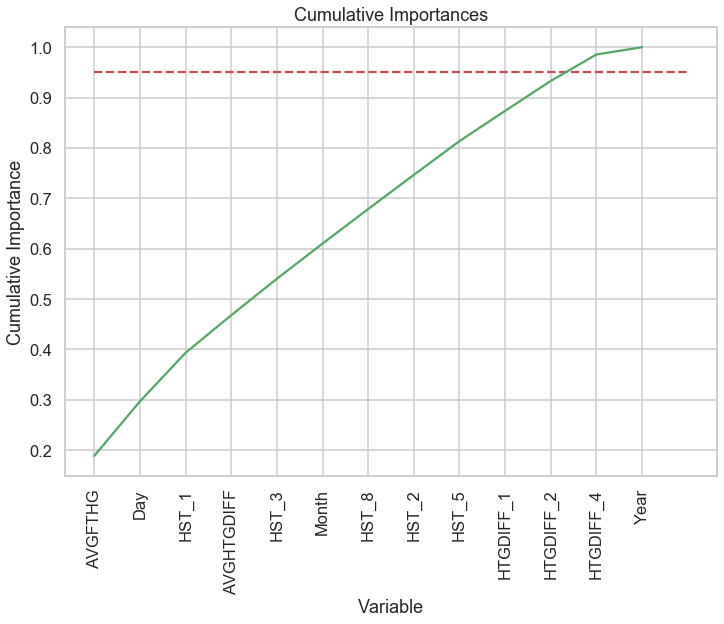

In [46]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(list(range(len(importances))), cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(list(range(len(importances))), sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [47]:
# Dates of training values
months = df_result[:, feature_list.index('Month')]
days = df_result[:, feature_list.index('Day')]
years = df_result[:, feature_list.index('Year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

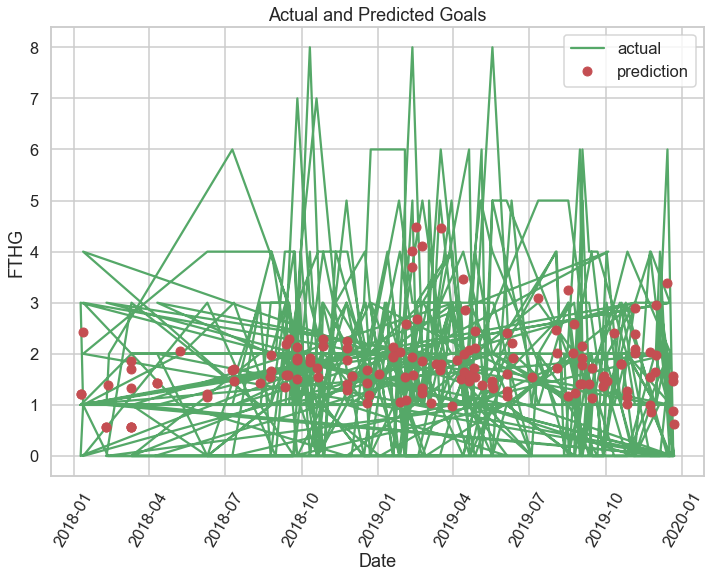

In [48]:
plt.plot(true_data['date'], true_data['actual'], 'g-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('FTHG'); plt.title('Actual and Predicted Goals');

## Random Forest Optimization through Random Search

In [49]:
rs = bp.prediction.random_search(train_features,train_labels,cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.2s finished


In [50]:
best_params = rs.best_params_

In [51]:
best_params

{'n_estimators': 373,
 'min_samples_split': 5,
 'max_leaf_nodes': 33,
 'max_features': 'auto',
 'max_depth': 12,
 'bootstrap': False}

In [52]:
rf = bp.prediction.random_forrest(
    train_features, train_labels, 
    n_estimators=best_params['n_estimators'],
    random_state = 42,
    min_samples_split = best_params['min_samples_split'],
    max_leaf_nodes = best_params['max_leaf_nodes'],
    max_features = best_params['max_features'],
    max_depth = best_params['max_depth'],
    bootstrap = best_params['bootstrap']
)


In [53]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Goals.')

Mean Absolute Error: 1.27 Goals.


In [54]:
# Calculate mean absolute percentage error (MAPE)
err = errors/test_labels
err[np.isnan(err)] = 0
mape = err * 100
mape[mape == inf] = 0
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 53.29 %.


In [55]:
next_games=df_result
predictions_next_games = rf.predict(next_games)
next_games_predictions=np.round(predictions_next_games,0)

In [56]:
next_games_predictions

array([1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2.,
       2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 4.,
       2., 4., 3., 3., 3., 8., 1., 5., 5., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 1., 1., 5., 4., 2., 4., 4., 6., 3., 6., 2., 2., 6., 1., 1., 3.,
       8., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 4., 1., 2., 2., 1.,
       1., 3., 1., 3., 1., 3., 4., 1., 5., 1., 2., 2., 1., 2., 2., 2., 2.,
       2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 5., 2., 2., 1., 2.,
       2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1.,
       1., 2., 1., 0., 0., 1., 1., 1., 2., 5., 2., 2., 2., 1., 1., 1., 2.,
       2., 1., 2., 2., 2., 1., 2., 2., 1., 5., 2., 1., 1., 1., 3., 2., 2.,
       1., 2., 1., 8., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 6., 4., 2.,
       1., 1., 2., 2., 2.

In [57]:
df_both_seasons['FTHG'] = next_games_predictions
df_both_seasons

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
151,22,12,2019,Fortuna Dusseldorf,Union Berlin,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,0.9
152,22,12,2019,Paderborn,Ein Frankfurt,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,1.4
145,21,12,2019,Bayern Munich,Wolfsburg,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,3.4
146,21,12,2019,RB Leipzig,Augsburg,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.2
147,21,12,2019,Mainz,Leverkusen,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,1.3
148,21,12,2019,Schalke 04,Freiburg,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.2
149,21,12,2019,FC Koln,Werder Bremen,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,1.6
150,21,12,2019,Hertha,M'gladbach,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
144,20,12,2019,Hoffenheim,Dortmund,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.9,1.1
139,18,12,2019,Leverkusen,Hertha,1.0,1.0,17.0,10.0,7.0,...,12.0,16.0,2.0,3.0,0.0,0.0,-1.0,1.0,0.1,1.4


In [59]:
df_both_seasons.to_excel('df_both_seasons_home.xlsx')